<b>The Stakeholders have asked for an update regarding results of the campaign. Following Key questions to be answered:</b>
1. What are the key insights on the following that you can derive from the data?
2. Based on the information provided,do you think the campaign was successful?
3. What limitations or data issues did you encounter while doing this analysis

Load the dataset of Airmiles

In [168]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('airmiles_cineplex_sample_dataset_feb15_mar14_2018.csv')

In [83]:
df.info() # we have 309677 entries in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309677 entries, 0 to 309676
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   fullVisitorId     309677 non-null  int64 
 1   visitId           309677 non-null  int64 
 2   visitNumber       309677 non-null  int64 
 3   visitStartTime    309677 non-null  object
 4   hitTime           309677 non-null  int64 
 5   hitType           309677 non-null  object
 6   hitNumber         309677 non-null  int64 
 7   hitIsInteraction  309677 non-null  object
 8   hostname          309677 non-null  object
 9   pageName          309677 non-null  object
 10  eventCategory     145743 non-null  object
 11  eventAction       145743 non-null  object
 12  eventLabel        145236 non-null  object
 13  isEntrance        89621 non-null   object
 14  isExit            80454 non-null   object
 15  deviceCategory    309677 non-null  object
 16  campaign          309677 non-null  obj

In [84]:
df.head()

,fullVisitorId,visitId,visitNumber,visitStartTime,hitTime,hitType,hitNumber,hitIsInteraction,hostname,pageName,eventCategory,eventAction,eventLabel,isEntrance,isExit,deviceCategory,campaign,source,medium,hits
0,6171949185047906658,1519045150,2,2018-02-19,15205,PAGE,4,Yes,offers.airmiles.ca,/,NaN,NaN,NaN,NaN,Yes,desktop,37095_CineplexFamilyFavourites,37095_LaunchEmail-Step1,Email-Solo,1
1,1693734296162181229,1520738414,1,2018-03-11,14403,EVENT,6,No,offers.airmiles.ca,/fr-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,desktop,(not set),staples.ca,referral,1
2,3654853287349435385,1520548863,1,2018-03-08,14811,EVENT,5,Yes,offers.airmiles.ca,/en-CA,on-page-interaction,click,/en-CA[/vpv/get-promo-codes-2],NaN,NaN,mobile,37095_PerksMarchBreakEmail,37569_Email-Solo,Email-Solo,1
3,6039957534302838246,1519427070,3,2018-02-23,188326,EVENT,6,No,offers.airmiles.ca,/fr-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1
4,2842891867524286713,1520552184,1,2018-03-08,90347,EVENT,20,No,offers.airmiles.ca,/en-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,tablet,37095_PerksMarchBreakEmail,37569_Email-Solo,Email-Solo,1


hitTime is in milliseconds which will be converted into minute to have more readability to the column

In [85]:
df['hitTime'] = df['hitTime'].div(60000).round(2)

In [86]:
df.head()

,fullVisitorId,visitId,visitNumber,visitStartTime,hitTime,hitType,hitNumber,hitIsInteraction,hostname,pageName,eventCategory,eventAction,eventLabel,isEntrance,isExit,deviceCategory,campaign,source,medium,hits
0,6171949185047906658,1519045150,2,2018-02-19,0.25,PAGE,4,Yes,offers.airmiles.ca,/,NaN,NaN,NaN,NaN,Yes,desktop,37095_CineplexFamilyFavourites,37095_LaunchEmail-Step1,Email-Solo,1
1,1693734296162181229,1520738414,1,2018-03-11,0.24,EVENT,6,No,offers.airmiles.ca,/fr-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,desktop,(not set),staples.ca,referral,1
2,3654853287349435385,1520548863,1,2018-03-08,0.25,EVENT,5,Yes,offers.airmiles.ca,/en-CA,on-page-interaction,click,/en-CA[/vpv/get-promo-codes-2],NaN,NaN,mobile,37095_PerksMarchBreakEmail,37569_Email-Solo,Email-Solo,1
3,6039957534302838246,1519427070,3,2018-02-23,3.14,EVENT,6,No,offers.airmiles.ca,/fr-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1
4,2842891867524286713,1520552184,1,2018-03-08,1.51,EVENT,20,No,offers.airmiles.ca,/en-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,tablet,37095_PerksMarchBreakEmail,37569_Email-Solo,Email-Solo,1


Check the different campaign, we have in the dataset

Since we have to analyse the data for the Cineplex Family Favourites, I will be filtering the data with the Cineplex Family Favorite Campaign

In [89]:
df[df['campaign'].str.contains('Family')]['campaign'].value_counts()

37095_CineplexFamilyFavourites    240268
37095_cineplexFamilyFavorites         10
Name: campaign, dtype: int64

<b>Define dataframe containing 'CineplexFamilyFavourites' in Campaign

In [90]:
Cineplex = df[df['campaign'].str.contains('Family')]

In [92]:
Cineplex.head()

,fullVisitorId,visitId,visitNumber,visitStartTime,hitTime,hitType,hitNumber,hitIsInteraction,hostname,pageName,eventCategory,eventAction,eventLabel,isEntrance,isExit,deviceCategory,campaign,source,medium,hits
0,6171949185047906658,1519045150,2,2018-02-19,0.25,PAGE,4,Yes,offers.airmiles.ca,/,NaN,NaN,NaN,NaN,Yes,desktop,37095_CineplexFamilyFavourites,37095_LaunchEmail-Step1,Email-Solo,1
3,6039957534302838246,1519427070,3,2018-02-23,3.14,EVENT,6,No,offers.airmiles.ca,/fr-CA,/utility,promo-site-click,click-get-promo-codes,NaN,NaN,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1
5,6919264011263941984,1518869861,1,2018-02-17,0.00,PAGE,1,Yes,offers.airmiles.ca,/en-CA,NaN,NaN,NaN,Yes,Yes,mobile,37095_CineplexFamilyFavourites,37095_LaunchEmail-Start,Email-Solo,1
6,2471431596475321569,1519815906,1,2018-02-28,0.00,PAGE,1,Yes,offers.airmiles.ca,/en-CA,NaN,NaN,NaN,Yes,Yes,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1
7,2560110748309585883,1520894903,2,2018-03-12,0.92,PAGE,4,Yes,offers.airmiles.ca,/,NaN,NaN,NaN,NaN,NaN,desktop,37095_CineplexFamilyFavourites,37095_ProdThumbnail,AM.CA-Rewards,1


In [125]:
Cineplex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240278 entries, 0 to 309676
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visitorId         240278 non-null  int64  
 1   sessionId         240278 non-null  int64  
 2   sessionNumber     240278 non-null  int64  
 3   timestamp         240278 non-null  object 
 4   hitTime           240278 non-null  float64
 5   hitType           240278 non-null  object 
 6   hitNumber         240278 non-null  int64  
 7   hitIsInteraction  240278 non-null  object 
 8   hostname          240278 non-null  object 
 9   pageName          240278 non-null  object 
 10  eventCategory     110064 non-null  object 
 11  eventAction       110064 non-null  object 
 12  eventLabel        109745 non-null  object 
 13  isEntrance        74252 non-null   object 
 14  isExit            65132 non-null   object 
 15  deviceCategory    240278 non-null  object 
 16  campaign          24

<b>Renaming Column names for better understanding</b>

In [93]:
Cineplex = Cineplex.rename(columns = {"fullVisitorId": "visitorId", "visitId": "sessionId",
                           "visitNumber":"sessionNumber", "visitStartTime": "timestamp"})

In [117]:
# assumed en is the default language.
Cineplex['language'] = Cineplex.apply(lambda x: "fr" if "fr-CA" in x.pageName else "en", axis=1)

In [118]:
Cineplex.head()

,visitorId,sessionId,sessionNumber,timestamp,hitTime,hitType,hitNumber,hitIsInteraction,hostname,pageName,...,eventAction,eventLabel,isEntrance,isExit,deviceCategory,campaign,source,medium,hits,language
0,6171949185047906658,1519045150,2,2018-02-19,0.25,PAGE,4,Yes,offers.airmiles.ca,/,...,NaN,NaN,NaN,Yes,desktop,37095_CineplexFamilyFavourites,37095_LaunchEmail-Step1,Email-Solo,1,en
3,6039957534302838246,1519427070,3,2018-02-23,3.14,EVENT,6,No,offers.airmiles.ca,/fr-CA,...,promo-site-click,click-get-promo-codes,NaN,NaN,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1,fr
5,6919264011263941984,1518869861,1,2018-02-17,0.00,PAGE,1,Yes,offers.airmiles.ca,/en-CA,...,NaN,NaN,Yes,Yes,mobile,37095_CineplexFamilyFavourites,37095_LaunchEmail-Start,Email-Solo,1,en
6,2471431596475321569,1519815906,1,2018-02-28,0.00,PAGE,1,Yes,offers.airmiles.ca,/en-CA,...,NaN,NaN,Yes,Yes,mobile,37095_CineplexFamilyFavourites,37095_Facebook-Paid,Facebook-Paid,1,en
7,2560110748309585883,1520894903,2,2018-03-12,0.92,PAGE,4,Yes,offers.airmiles.ca,/,...,NaN,NaN,NaN,NaN,desktop,37095_CineplexFamilyFavourites,37095_ProdThumbnail,AM.CA-Rewards,1,en


# Data Exploration

<b> How many days of data we have? </b>

In [121]:
x = Cineplex['timestamp'].unique()
x.sort()
x

array(['2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
       '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
       '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
       '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
       '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06',
       '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10',
       '2018-03-11', '2018-03-12', '2018-03-13', '2018-03-14',
       '2018-03-15'], dtype=object)

<b>From above it seems that we have data till March 15th although, the campaign ran till May 17th. This shows that we have incomplete to analyse the success of the campaign.</b>

 How's total traffic or total session id in this duration ?

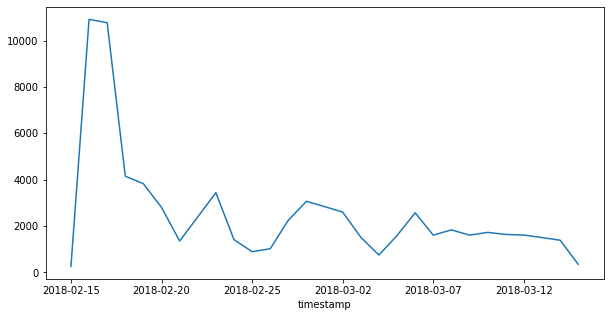

In [135]:
line = Cineplex.groupby(by = 'timestamp')['sessionId'].nunique()
line.plot.line(x = 'timestamp', y = 'nunique', figsize=(10,5))

<b>The above shows that unique sessions increased in the first two days and dropped drastically after february 17th.</b>

How many unique visitors we had for Cineplex Family Favourites?

In [95]:
Cineplex['visitorId'].nunique()

55094

How many unique sessions we got for Cineplex Family Favourites?

In [141]:
Cineplex['sessionId'].nunique()

73710

Which pages are explored the most in the campaign?

Total PageView by Session: Counted pageview with HitType as 'Page' by session

In [180]:
pagehit = Cineplex[Cineplex['hitType'].str.contains('PAGE')]
pagehit.groupby(by= 'pageName')['sessionId'].count().sort_values(ascending = False).head(20)

pageName
/en-CA                                             81778
/en-CA/checkout                                    10527
/                                                  10495
/fr-CA                                              8131
/en-CA/confirmation                                 7579
/en-CA/my-codes                                     2161
/en-CA/terms                                        1722
/fr-CA/checkout                                     1032
/false-featured-movies                              1025
/fr-CA/confirmation                                  684
/en-CA[/vpv/main-nav-familyfavourites]               324
/en-CA[/vpv/main-nav-theatres]                       294
/en-CA[/vpv/main-nav-movies]                         263
/fr-CA/terms                                         250
/en-CA[/vpv/main-nav-mycodes]                        250
/fr-CA/my-codes                                      237
/en-CA/checkout[/vpv/main-nav-familyfavourites]      213
/en-CA/my-codes[/vpv/m

Total Unique PageView by Session: Counted Pageview with HitType as 'Page' by unique session

In [138]:
pagehit.groupby(by= 'pageName')['sessionId'].nunique().sort_values(ascending = False).head(20)

pageName
/en-CA                                             61366
/                                                   9787
/en-CA/checkout                                     8114
/en-CA/confirmation                                 6418
/fr-CA                                              6334
/en-CA/my-codes                                     1766
/en-CA/terms                                        1623
/false-featured-movies                              1005
/fr-CA/checkout                                      778
/fr-CA/confirmation                                  596
/en-CA[/vpv/main-nav-familyfavourites]               275
/en-CA[/vpv/main-nav-theatres]                       274
/en-CA[/vpv/main-nav-movies]                         251
/fr-CA/terms                                         235
/en-CA[/vpv/main-nav-mycodes]                        219
/en-CA/my-codes[/vpv/main-nav-familyfavourites]      199
/en-CA/checkout[/vpv/main-nav-familyfavourites]      197
/fr-CA/my-codes       

<b>Exploring Event Category, Event Action and Event Label</b>

In [197]:
Cineplex['eventCategory'].value_counts()

on-page-interaction    66606
/utility               38363
/page-scroll            5095
Name: eventCategory, dtype: int64

In [196]:
Cineplex['eventAction'].value_counts()

click                             66606
promo-site-click                  37321
percent-25                         2298
percent-50                         1680
percent-80                         1117
promo-codes-order-confirmation     1042
Name: eventAction, dtype: int64

In [199]:
df['eventLabel'].value_counts().head(20)

click-get-promo-codes                                     40997
/en-CA[/vpv/get-promo-codes-2]                            23024
/en-CA/checkout[/vpv/get-promo-codes-submit-1]            12148
click-visit-cineplex                                       7445
/en-CA[/vpv/find-location-btn]                             7329
/en-CA[/vpv/get-promo-codes-4]                             6472
/en-CA[/vpv/get-promo-codes-5]                             3953
/en-CA/checkout[/vpv/get-promo-codes-submit-btn]           2610
/fr-CA[/vpv/get-promo-codes-2]                             2372
/en-CA[/vpv/get-promo-codes-3]                             2048
/en-CA[/vpv/get-promo-codes-family-favourites-top-btn]     1653
promo-codes-displayed                                      1401
/en-CA[/vpv/visit-cineplex-3]                              1100
/en-CA[/vpv/get-promo-codes-6]                             1085
/fr-CA[/vpv/find-location-btn]                             1034
/fr-CA/checkout[/vpv/get-promo-codes-sub

<b>Assumptions for Eventlabel</b>
 <ul>Submitting/applying for Promo-Code on checkout: 
<li>"/fr-CA/checkout[/vpv/get-promo-codes-submit-1]"</li>
<li>"/en-CA/checkout[/vpv/get-promo-codes-submit-1]"</li> </ul>
<ul>For Cineplex Website tab from where collector go to Cineplex Website: 
<li>"click-visit-cineplex"</li></ul>


How many times users clicked on promo-code on checkout page ?

In [153]:
get_promo_code = Cineplex[(Cineplex['eventLabel'] == '/fr-CA/checkout[/vpv/get-promo-codes-submit-1]') | 
         (Cineplex['eventLabel'] == '/en-CA/checkout[/vpv/get-promo-codes-submit-1]')]['sessionId'].count()
get_promo_code

10005

How many times users clicked on cineplex tab on the Order confirmation page?

In [149]:
cineplex = Cineplex[Cineplex['eventLabel'] == 'click-visit-cineplex']['pageName'].count()
cineplex

5096

what percent of sessionId clicked on cineplex tab with respect to confirmation pageviews?

In [200]:
(cineplex/89909)*100   #denominator adding the number of pageview on /en-ca and /fr-ca (81778+8131)

5.667953152632106

What percent of sessionId applied for promo-code with respect to checkout pageviews with respect to homepage?

In [185]:
(get_promo_code/89909)*100 #denominator adding the number of pageview on /en-ca and /fr-ca (7579+8131)

11.12791822843097

What percent of sessions clicked on Cineplex Visit tab on confirmation page?

In [190]:
(cineplex/8263)*100  #denominator adding the number of pageview on /en-ca/confirmation and /fr-ca/confirmation (7579+684)

61.672516035338255

What percent of sessions applied for promo-code on checkout pageviews?

In [201]:
(get_promo_code/11559)*100 #denominator adding the number of pageview on /en-ca/checkout and /fr-ca/checkout (10527+1032)

86.55593044381001

In [192]:
bar = Cineplex.groupby(by = 'source')['sessionId'].nunique().sort_values(ascending = False)
bar

source
37095_LaunchEmail              19324
37095_Facebook-Paid            18075
37095_Voken                     9019
37095_LaunchEmail-Start         8001
37095_Vanity                    7811
37095_ProdThumbnail             4022
37095_CodeConfirmationEmail     2563
37095_L2-Cat-Banner             1548
37095_MobilePush                1460
37095_LaunchEmail-Step1         1443
37095_HomePage                  1253
37095_L1-Cat-Banner              774
37095_PDP-Banner                 606
37095_Email-eNewsletter          243
37095_LauncheNews                146
37095_TeamAM                     124
37095_LaunchWeb                   87
37095_LaunchEmail-Step2            4
37095_Face                         1
Name: sessionId, dtype: int64